# Vibração Livre de um Sistema de Um Grau de Liberdade

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

## Sistema Massa-Mola

![](figuras/fig2-1.png)

$F_m = -k x$

$F_m = m a$

$-k x = m \ddot{x}$

**Equação Diferencial de Movimento:**

$m \ddot{x} + k x = 0 $

$C.I. \rightarrow \left\{ \begin{array} x(0) = x_0 \\ \dot{x}(0) = v_0 \end{array} \right.$


Resolvendo esta EDO...

In [1]:
from sympy import *

In [2]:
t = symbols('t')
m,k = symbols('m k',positive = True)
x0,v0 = symbols('x0 v0')
x = Function('x')(t)

In [3]:
EDM = Eq(m*x.diff(t,2) + k*x,0)
EDM

Eq(k*x(t) + m*Derivative(x(t), (t, 2)), 0)

In [4]:
sol = dsolve(EDM)
sol

Eq(x(t), C1*sin(sqrt(k)*t/sqrt(m)) + C2*cos(sqrt(k)*t/sqrt(m)))

**Define-se:**

$\omega_n = \sqrt{\dfrac{k}{m}}$

Onde $\omega_n$ é chamado de **pulsação natural** ou **frequência circular natural não amortecida**.

In [5]:
omega_n = symbols('omega_n')
sol = sol.subs(sqrt(k/m),omega_n)
sol

Eq(x(t), C1*sin(omega_n*t) + C2*cos(omega_n*t))

Para encontrarmos os valores de $C_1$ e $C_2$ usaremos as **condições iniciais**:

$x(0) = x_0$

$\dot{x}(0) = v_0$

In [6]:
CI_1 = Eq(x0,sol.rhs.subs(t,0))
CI_1

Eq(x0, C2)

In [7]:
sol = sol.subs('C2',x0)
sol

Eq(x(t), C1*sin(omega_n*t) + x0*cos(omega_n*t))

In [8]:
x_ponto = sol.rhs.diff(t)
Eq(x.diff(t),x_ponto)

Eq(Derivative(x(t), t), C1*omega_n*cos(omega_n*t) - omega_n*x0*sin(omega_n*t))

In [9]:
CI_2 = Eq(v0,x_ponto.subs(t,0))
CI_2

Eq(v0, C1*omega_n)

In [10]:
C1 = solve(CI_2,'C1')[0]

In [11]:
sol = sol.subs('C1',C1)
sol

Eq(x(t), x0*cos(omega_n*t) + v0*sin(omega_n*t)/omega_n)

Logo, com esta equação, podemos obter a resposta, $x(t)$, do sistema para qualquer instante de tempo. 

$x{\left(t \right)} = x_{0} \cos{\left(\omega_{n} t \right)} + \frac{v_{0} \sin{\left(\omega_{n} t \right)}}{\omega_{n}}$

Podemos escrever esta equação de outra forma: 

$x(t) = X_0 sen(\omega_n t + \phi)$

onde, $X_0 = \sqrt{x_0^2 + \left(\dfrac{v_0}{\omega_n} \right)^2}$

e $tg \phi = \dfrac{\omega_n x_0}{v_0}$

**Observação:**

Utilizando $\omega_n = \sqrt{\dfrac{k}{m}}$ podemos reescrever a equação de movimento como: 

$\ddot{x} + \omega_n^2 x = 0 $

## Obtenção das Equações de Movimento pelo Método de Lagrande para Sistemas Conservativos

**Coordenadas Generalizadas:**

A determinação da configuração do sistema se faz por meio de um conjunto de funções escalares do tempo, $q_1(t)$, $q_2(t)$, $q_n(t)$ denominadas coordenadas generalizadas. 

Energia Cinética $\rightarrow$ $T$

![](figuras\fig2-2.png)
![](figuras\fig2-3.png)

Energia Potencial $\rightarrow$ $U$

![](figuras\fig2-4.png)

**Lagrangeano:**

$\mathscr{L} = T - U$

Equação de Lagrange para sistemas consevativos:

$\dfrac{d}{dt}\left( \dfrac{\partial \mathscr{L}}{\partial \dot{q}_i}\right) - \dfrac{\partial \mathscr{L}}{\partial q_i} = 0 \qquad i = 1,2,...,n$

### Exemplo 1:

Obtenha a frequência angular, $\omega_n$ do seguinte sistema mecânico e um gráfico do deslocamento em função do tempo para as seguintes condições iniciais: $\theta(0) = \pi/6$ e $\dot{\theta}(0) = 0$.

Dados: 

Raio = 0.2m

Massa do bloco = 0.5kg

Massa do disco = 0.5kg

Rigidez da mola = 1000N/m

![](figuras\fig2-5.png)

In [12]:
m,I,k,R = symbols('m I k R',positive = True)
t = symbols('t')
theta = Function('theta')(t)

Considerando que:

$x = R \theta$

In [13]:
T = m*(R*theta.diff(t))**2/2 + I*(theta.diff(t))**2/2
T

I*Derivative(theta(t), t)**2/2 + R**2*m*Derivative(theta(t), t)**2/2

In [14]:
U = k*(R*theta)**2/2
U

R**2*k*theta(t)**2/2

In [15]:
L = T - U
L

I*Derivative(theta(t), t)**2/2 - R**2*k*theta(t)**2/2 + R**2*m*Derivative(theta(t), t)**2/2

In [16]:
EDM = Eq((L.diff(theta.diff(t))).diff(t) - L.diff(theta),0)
EDM

Eq(I*Derivative(theta(t), (t, 2)) + R**2*k*theta(t) + R**2*m*Derivative(theta(t), (t, 2)), 0)

In [17]:
Eq(theta.diff(t,2),solve(EDM,theta.diff(t,2))[0])

Eq(Derivative(theta(t), (t, 2)), -R**2*k*theta(t)/(I + R**2*m))

Logo, observa-se que:

$\omega_n = \sqrt{\frac{R^{2} k }{I + R^{2} m}}$

Resolvendo a EDO de segunda ordem: 

In [18]:
sol = dsolve(EDM)
dsolve(EDM)

Eq(theta(t), C1*sin(R*sqrt(k)*t/sqrt(I + R**2*m)) + C2*cos(R*sqrt(k)*t/sqrt(I + R**2*m)))

In [19]:
omega_n = symbols('omega_n')
sol.subs(R*sqrt(k/(I+R**2*m)),omega_n)

Eq(theta(t), C1*sin(omega_n*t) + C2*cos(omega_n*t))

Temos que: $\theta(0) = \pi/6$ e $\dot{\theta}(0) = 0$

In [20]:
CI_1 = Eq(pi/6,sol.rhs.subs(t,0))
CI_1

Eq(pi/6, C2)

In [21]:
sol = sol.subs('C2',pi/6)
sol

Eq(theta(t), C1*sin(R*sqrt(k)*t/sqrt(I + R**2*m)) + pi*cos(R*sqrt(k)*t/sqrt(I + R**2*m))/6)

In [22]:
CI_2 = Eq(0,sol.rhs.diff(t).subs(t,0))
CI_2

Eq(0, C1*R*sqrt(k)/sqrt(I + R**2*m))

In [23]:
sol = sol.subs('C1',0)
sol

Eq(theta(t), pi*cos(R*sqrt(k)*t/sqrt(I + R**2*m))/6)

In [24]:
dados = {R:0.2,m:0.5,I:0.5*0.2**2/2,k:1000}

In [25]:
theta_t = sol.rhs.subs(dados)
theta_t

pi*cos(11.5470053837925*sqrt(10)*t)/6

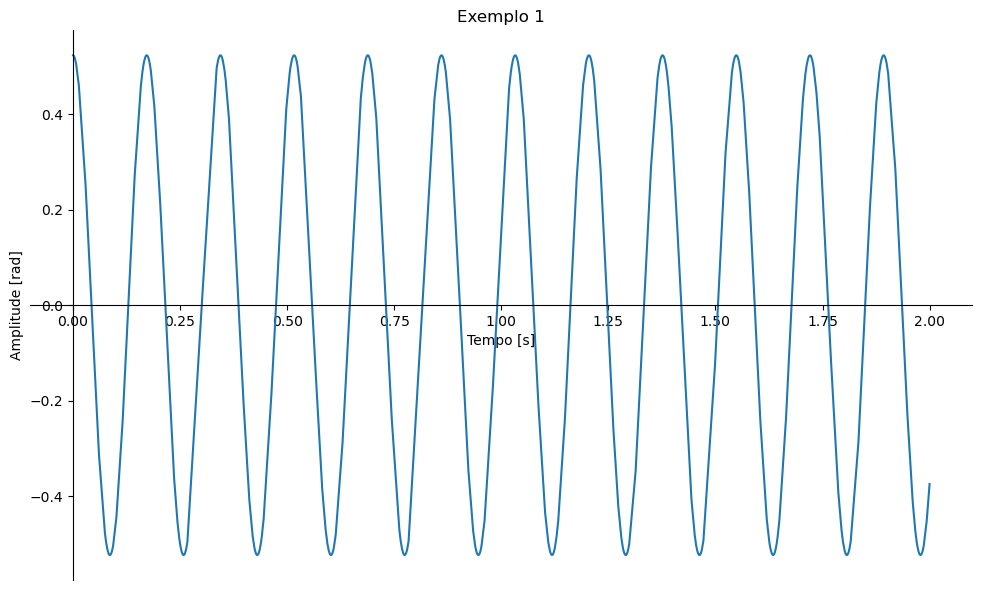

In [36]:
p1 = plot(theta_t,(t,0,2),show=False)
p1.size = (10,6)
p1.title = 'Exemplo 1'
p1.xlabel = 'Tempo [s]'
p1.ylabel = 'Amplitude [rad]'
p1.show()